# Exploratory Data Analysis

## Objectives

+ Explore the dataset and find usegul feature that will help in efficient data modelling to predict car price.

## Table of Content

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
+  <a href="#import">Import Dependencies and Dataset</a>
+  <a href="#var-analysis">Analysis over individual variable</a>
    + <a href="#num-var-analysis">Numerical Variable Analysis</a>
    + <a href="#cat-var-analysis">Categorical Variable Analysis</a>
+  <a href="#des-statistic">Descriptive Statistical Analysis</a>
+  <a href="#grouping-data">Grouping Data</a>
+  <a href="#pear-corr">Pearson Correlation</a>
+  <a href="#anova">ANOVA</a>

</div>

### Install Dependencies

In [1]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
print('Dependencies has been installed successfully.')

## <div id="import"></div>&#9724; Import Dependencies and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
print('Dependencies has been loaded successfully.')

Dependencies has been loaded successfully.


In [3]:
pd.set_option('display.max_columns', 50)
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
# Reading dataset and creating DataFrame
path = 'output/Carprice_data.csv'
df = pd.read_csv(path)
df.shape

(201, 30)

In [5]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [6]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

In [57]:
df_corr = df.corr()
df_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


In [64]:
df_corr[df_corr['price'] > 0].price.sort_values(ascending=False)

price                1.000000
engine-size          0.872335
curb-weight          0.834415
horsepower           0.809607
width                0.751265
length               0.690628
wheel-base           0.584642
bore                 0.543155
aspiration-turbo     0.179578
height               0.135486
normalized-losses    0.133999
fuel-type-diesel     0.110326
stroke               0.082269
compression-ratio    0.071107
Name: price, dtype: float64

#### As per expectation engine-size, curb-weight and horsepower are highly correlated with price.
Let's move more deeper with Individual Varaibale Analysis.

## <div id='var-analysis'></div>&#9724; Individual Variable Analysis

#### Here we are going to analyze each and every variable by checking relation of the variables with price.

### <div id="num-var-analysis"></div>Continuous Numerical Variable Analysis

<p>Variable analysis is a key characteristic of quantitative research. While qualitative analysis tends to be concerned more with themes, interpretation and the use of language, quantitative analysis examines variables, which are typically collected through surveys, although sometimes by other methods such as observation.</p>

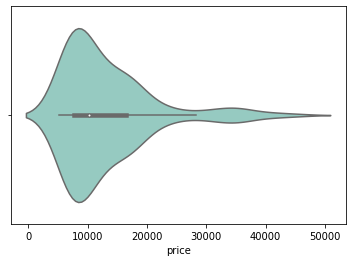

In [9]:
# plotting price distribution
sns.violinplot(df['price'], palette="Set3")
plt.show()

Our dataset contains all positive value in price column. Most of the car data that we have lies in range of 5000 to 20000.

### Engine-Size vs Price

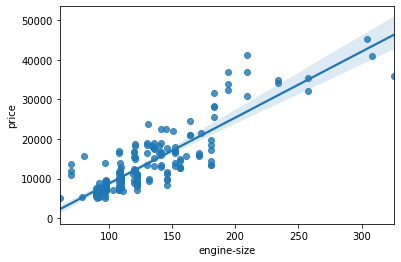

In [55]:
# engine size vs price
sns.regplot(x="engine-size", y="price", data=df)
plt.show()

Engine-size can be used as good predictor for car price as the it satisfies the linear property i.e with the increase in engine-size the price also increase.

In [11]:
# relation of engine-size and price
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


The strength of relation between engine-size and price is pretty good (~0.872 of 1).

### Highway-mpg vs Price

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

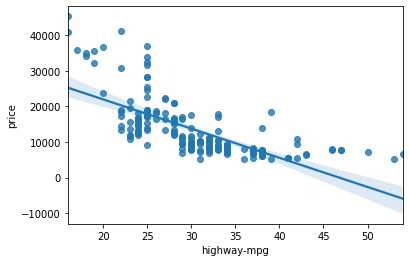

In [12]:
# highway-price vs price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.show()

The highway-mpg didn't went well with the price. As we know the carprice depends on miles per gallons also, but the plot show that with increase in mpg price decrease. So here our highway-mpg is negatively correlated with the price. So we will take it into consideration.

In [13]:
# relation of highway-mpg and price
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


-0.70 which means highway-mpg has strong negative correlation with price.

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

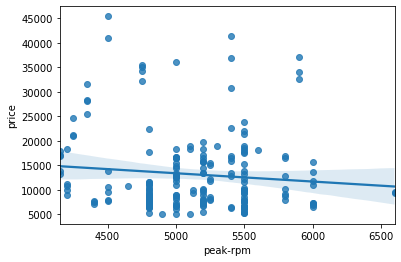

In [14]:
# peak-rpm vs price
sns.regplot(x="peak-rpm", y="price", data=df)
plt.show()

In [15]:
# relation of peak-rpm and price
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

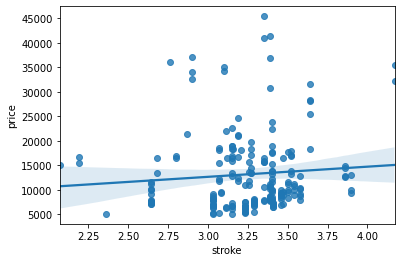

In [16]:
# stroke vs price
sns.regplot(x="stroke", y="price", data=df)

In [17]:
# realtion of stroke vs price
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


### <div id="cat-var-analysis"></div>Categorical Variables Analysis

In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed, number of possible values, assigning each individual or other unit of observation to a particular group or nominal category on the basis of some qualitative property.

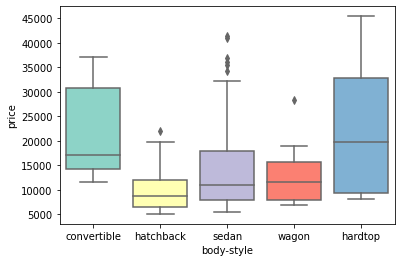

In [18]:
sns.boxplot(x="body-style", y="price", data=df, palette = 'Set3', saturation = 1)
plt.show()

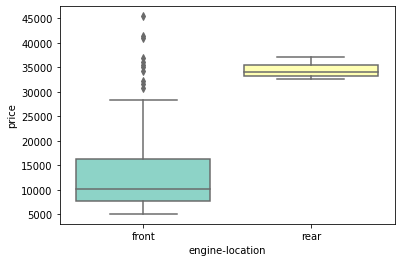

In [19]:
sns.boxplot(x="engine-location", y="price", data=df, palette = 'Set3', saturation = 1)
plt.show()

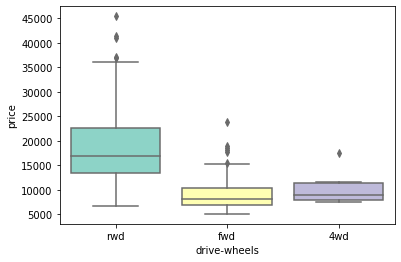

In [20]:
sns.boxplot(x="drive-wheels", y="price", data=df, palette = 'Set3', saturation = 1)
plt.show()

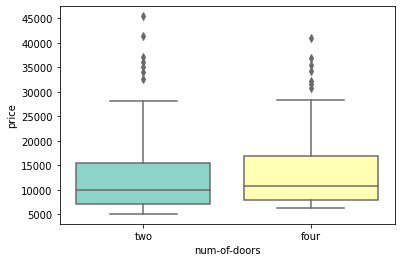

In [21]:
sns.boxplot(x="num-of-doors", y="price", data=df, palette = 'Set3', saturation = 1)
plt.show()

In [22]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low,0,1,1,0


## <div id="des-statistic"></div>&#9724; Descriptive Statistical Analysis

In [23]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.describe(include="object")

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [25]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [26]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [27]:
# engine-location as variable
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


## <div id="grouping-data"></div>&#9724; Grouping Data

In [28]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [29]:
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [30]:
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [31]:
df_group_two = df[['body-style','price']]
df_group_two.groupby('body-style', as_index = False).mean()

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [32]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [33]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [34]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

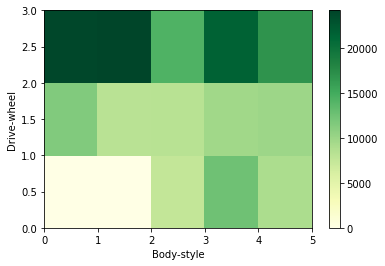

In [35]:
plt.pcolor(grouped_pivot, cmap='YlGn')
plt.colorbar()
plt.xlabel('Body-style')
plt.ylabel('Drive-wheel')
plt.show()

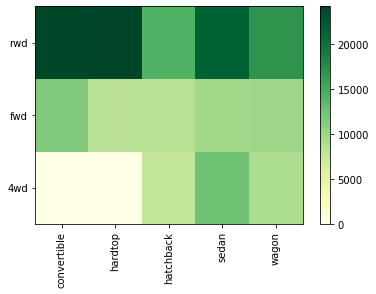

In [36]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='YlGn')

row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [37]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098128,-0.063561,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


## <div id="pear-corr"></div>&#9724; Pearson Correlation

In [38]:
from scipy import stats

### Curb-weight vs Price

In [43]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])

print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936914e-53


<details><summary>Conclusion (Click Here):</summary>

The p-value is < 0.001 so the correlation between curb-weight and price is statistically significant.<br>
And the linear relationship is also strong.
</details>

### Width vs Price

In [42]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481516e-38


<details><summary>Conclusion (Click Here):</summary>

The p-value is < 0.001 so the correlation between width and price is statistically significant.<br>
And the linear relationship is also strong.
</details>

### Wheel-base vs Price

In [39]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270733218e-20


<details><summary>Conclusion (Click Here):</summary>
The p-value is < 0.001 so the correlation between wheel-base and price is statistically significant.<br>
But the linear relationship is average good.
</details>

### Horsepower vs Price

In [40]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8096068016571054  with a P-value of P =  6.273536270650504e-48


<details><summary>Conclusion (Click Here):</summary>
    
The p-value is < 0.001 so correlation between horsepower and price is statistically significant.<br>
And linear relationship is also strong.
</details>

### Engine-size vs Price

In [44]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


<details><summary>Conclusion (Click Here):</summary>
    
The p-value is < 0.001 so the correlation between engine-size and price is statistically significant.<br>
The linear relationship is also strong.
</details>

### Bore vs Price

In [45]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935489e-17


<details><summary>Conclusion (Click Here):</summary>
    
The p-value is < 0.001 so the correlation between bore and price is statistically significant.<br>
The linear relationship is average good.
</details>

### Length vs Price

In [41]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466158986e-30


<details><summary>Conclusion (Click Here):</summary>
    
The p-value is < 0.001 so the correlation between length and price is statistically significant.<br>
Also the linear relationship seems strong.
</details>

### City-mpg vs Price

In [46]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])

print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.321132065567674e-29


<details><summary>Conclusion (Click Here):</summary>
Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.
</details>

### Highway-mpg vs Price

In [47]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])

print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589529  with a P-value of P =  1.7495471144477352e-31


<details><summary>Conclusion (Click Here):</summary>
    
The p-value is < 0.001 so the correlation between highway-mpg and price is statistically significant.<br>
The relationship is negatively strong.

</details>

## <div id="anova"></div>&#9724; ANOVA

<p>An Analysis of Variance Test, or ANOVA, can be thought of as a generalization of the t-tests for more than 2 groups. The independent t-test is used to compare the means of a condition between two groups. ANOVA is used when we want to compare the means of a condition between more than two groups.</p>

<p>Basically, ANOVA is performed by comparing two types of variation, the variation between the sample means, as well as the variation within each of the samples. The below-mentioned formula represents one-way Anova test statistics.</p>

The result of the ANOVA formula, the F statistic (also called the F-ratio), allows for the analysis of multiple groups of data to determine the variability between samples and within samples.

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/ANOVA_1.png" height="400px" width="600px">
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/ANOVA_2.png" height="300px" width="500px">

In [48]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [49]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

#### fwd vs rwd vs 4wd

In [50]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


#### fwd vd rwd

In [51]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd vs rwd

In [52]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### 4wd vs fwd

In [53]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


## &#9724; Conclusion :

#### Numerical Variable
+ Length
+ Width
+ Curb-weight
+ Engine-size
+ Horsepower
+ City-mpg
+ Highway-mpg
+ Wheel-base
+ Bore

#### Categorical Variable
+ Drive-wheels